In [1]:
import pandas as pd
import os

In [2]:
#reading file 
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")



In [3]:
#merging files
all_files = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    
    df = pd.read_csv("./Sales_Data/"+file)
    all_files = pd.concat([all_files,df])
all_files.to_csv('all_files.csv',index = False)



In [4]:
all_data = pd.read_csv('all_files.csv')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
#cleaning data
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
#what was the best month of sales and how much was earned?
#adding month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [9]:
#adding sales colums 
all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [10]:
all_data.groupby('Month').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


In [11]:
import matplotlib.pyplot as plt
results = all_data.groupby('Month').sum() 


<function matplotlib.pyplot.show(close=None, block=None)>

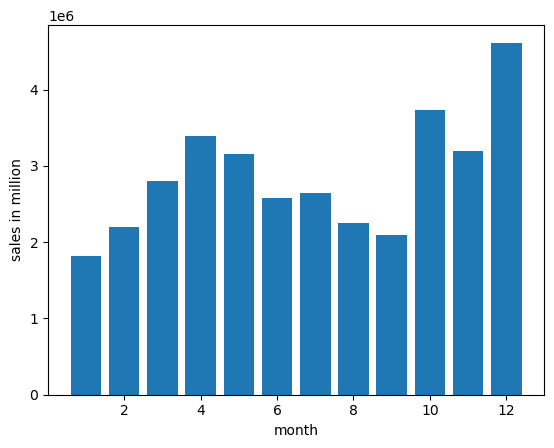

In [12]:
months = range(1,13)
plt.bar(months , results['Sales'])
plt.xlabel('month')
plt.ylabel('sales in million')
plt.show

### city with most sales

In [13]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + '('+ x.split(',')[2].split(' ')[1]+')' )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [14]:
results = all_data.groupby('City').sum() 
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta(GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin(TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston(MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas(TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles(CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City(NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland(ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland(OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco(CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


<function matplotlib.pyplot.show(close=None, block=None)>

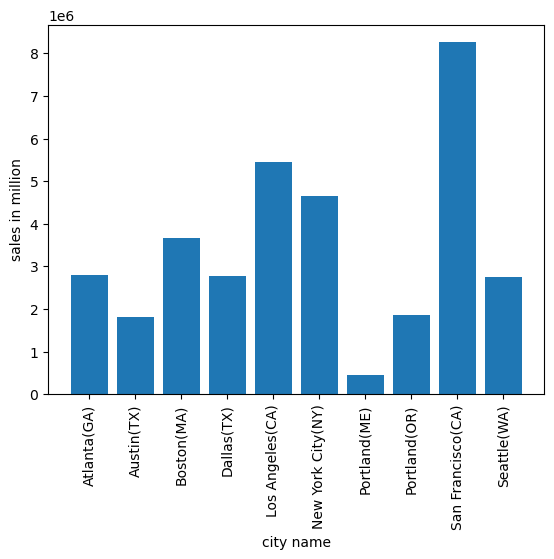

In [15]:
city = [city for city , df in all_data.groupby('City')]
plt.bar(city , results['Sales'])
plt.xticks(city, rotation = 'vertical' , size = 10 )
plt.xlabel('city name')
plt.ylabel('sales in million')
plt.show

### what time is the best to display adverisment to get max the customers buying products

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [17]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['hour'] = all_data['Order Date'].dt.hour
all_data.head()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_19384\3286361825.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9


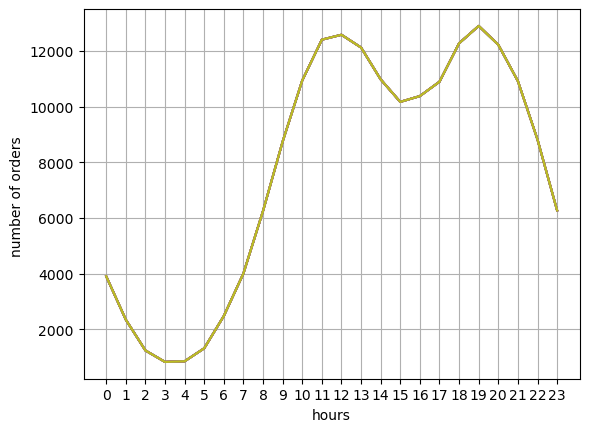

In [18]:
hours = [hour for hour,df in all_data.groupby('hour')]
plt.plot(hours , all_data.groupby(['hour']).count())
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('number of orders ')
plt.grid()
plt.show()


### product that sold the most 

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9


In [24]:
prod = all_data.groupby('Product')[all_data.select_dtypes(include='number').columns].sum()



,Quantity Ordered,Price Each,Month,Sales,hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


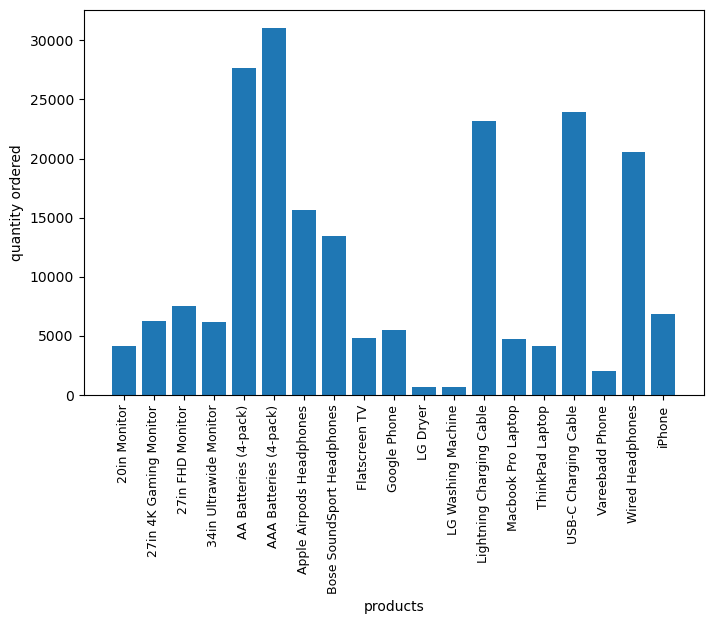

In [38]:
prod = all_data.groupby('Product')['Quantity Ordered'].sum()
products = prod.index.tolist()
quantity_ord = prod.values.tolist()
plt.figure(figsize=(8,5))
plt.bar(products , quantity_ord)
plt.xticks(products , rotation='vertical', size = 9 )
plt.xlabel('products')
plt.ylabel('quantity ordered')
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_19384\4195028877.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products , rotation = 'vertical' , size = 8)


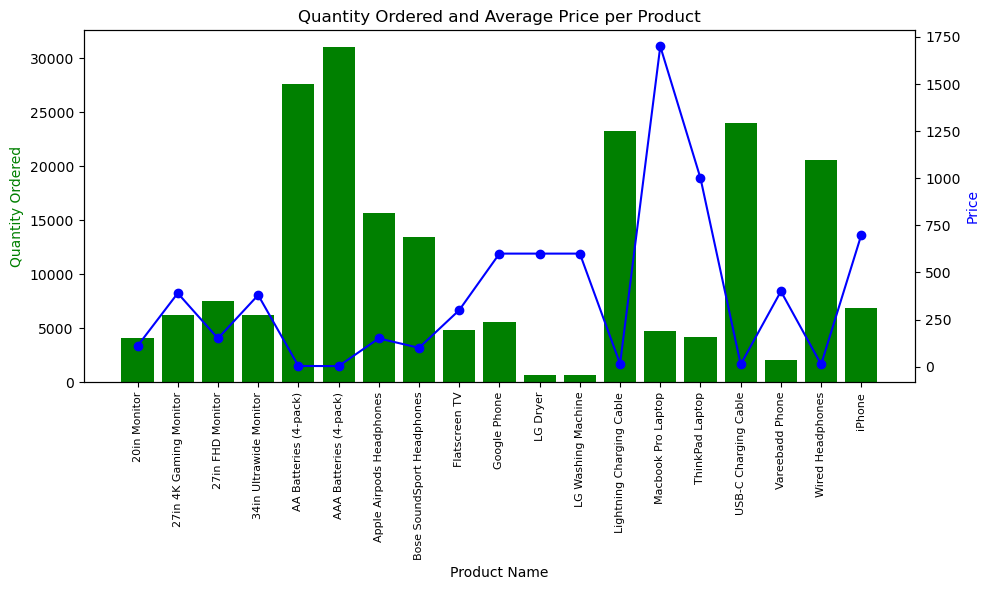

In [69]:
#grouping dataset by each unique product , calculating the average price for each product from price each col
#resulting a series of index of product name , value is average price of a product 
price = all_data.groupby('Product')['Price Each'].mean()

# a figure is created , shared x axis , diffrenet y axis
fig, ax1 = plt.subplots(figsize=(10, 6)) 

ax2 = ax1.twinx()
#x-axis is productt , y axis is quantity of order
ax1.bar(products, quantity_ord, color='green')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='green')
#Plottin average price on the secondary y-axis as a line plot
ax2.plot(products, price, color='blue', marker='o')
ax2.set_ylabel('Price', color='blue')
ax1.set_xticklabels(products , rotation = 'vertical' , size = 8)
plt.title('Quantity Ordered and Average Price per Product')
plt.tight_layout()
plt.show()